In [5]:
# Import packages
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [2]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
# One-hot encode the target variable
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test)
print(X_test.shape)
print(y_test)
print(y_test.shape)

(120, 4)
(120, 3)
[[5.8 2.8 5.1 2.4]
 [6.  2.2 4.  1. ]
 [5.5 4.2 1.4 0.2]
 [7.3 2.9 6.3 1.8]
 [5.  3.4 1.5 0.2]
 [6.3 3.3 6.  2.5]
 [5.  3.5 1.3 0.3]
 [6.7 3.1 4.7 1.5]
 [6.8 2.8 4.8 1.4]
 [6.1 2.8 4.  1.3]
 [6.1 2.6 5.6 1.4]
 [6.4 3.2 4.5 1.5]
 [6.1 2.8 4.7 1.2]
 [6.5 2.8 4.6 1.5]
 [6.1 2.9 4.7 1.4]
 [4.9 3.6 1.4 0.1]
 [6.  2.9 4.5 1.5]
 [5.5 2.6 4.4 1.2]
 [4.8 3.  1.4 0.3]
 [5.4 3.9 1.3 0.4]
 [5.6 2.8 4.9 2. ]
 [5.6 3.  4.5 1.5]
 [4.8 3.4 1.9 0.2]
 [4.4 2.9 1.4 0.2]
 [6.2 2.8 4.8 1.8]
 [4.6 3.6 1.  0.2]
 [5.1 3.8 1.9 0.4]
 [6.2 2.9 4.3 1.3]
 [5.  2.3 3.3 1. ]
 [5.  3.4 1.6 0.4]]
(30, 4)
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]
(30, 3)


In [13]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train)
print(X_test)

[[ 0.61303014  0.10850105  0.94751783  0.736072  ]
 [-0.56776627 -0.12400121  0.38491447  0.34752959]
 [-0.80392556  1.03851009 -1.30289562 -1.33615415]
 [ 0.25879121 -0.12400121  0.60995581  0.736072  ]
 [ 0.61303014 -0.58900572  1.00377816  1.25412853]
 [-0.80392556 -0.82150798  0.04735245  0.21801546]
 [-0.21352735  1.73601687 -1.19037495 -1.20664002]
 [ 0.14071157 -0.82150798  0.72247648  0.47704373]
 [ 0.02263193 -0.12400121  0.21613346  0.34752959]
 [-0.09544771 -1.05401024  0.10361279 -0.04101281]
 [ 1.0853487  -0.12400121  0.94751783  1.1246144 ]
 [-1.39432376  0.34100331 -1.41541629 -1.33615415]
 [ 1.20342834  0.10850105  0.72247648  1.38364267]
 [-1.04008484  1.03851009 -1.24663528 -0.81809761]
 [-0.56776627  1.50351461 -1.30289562 -1.33615415]
 [-1.04008484 -2.4490238  -0.1776889  -0.30004108]
 [ 0.73110978 -0.12400121  0.94751783  0.736072  ]
 [ 0.96726906  0.57350557  1.0600385   1.64267094]
 [ 0.14071157 -1.98401928  0.66621615  0.34752959]
 [ 0.96726906 -1.2865125   1.11

In [14]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [15]:
# Neural Network Model Class
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return self.softmax(x)

In [47]:

# Hyperparameters
input_size = X_train.shape[1]
hidden_size = 10
output_size = y_train.shape[1]
learning_rate = 0.05
iterations = 1000

# Initialize the neural network model
model = NeuralNetwork(input_size, hidden_size, output_size)
print(model)

NeuralNetwork(
  (hidden): Linear(in_features=4, out_features=10, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=10, out_features=3, bias=True)
  (softmax): Softmax(dim=1)
)


In [48]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Training the model
cost_history = []
for epoch in range(iterations):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, torch.max(y_train_tensor, 1)[1])

    # Backward pass and optimization
    optimizer.zero_grad() #Clears old gradients from the last step (otherwise gradients would be accumulated).
    loss.backward() # Computes the gradient of the loss with respect to the model parameters (i.e., weights and biases).
    optimizer.step() # Updates the model parameters using the computed gradients.

    cost_history.append(loss.item())

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{iterations}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.9831
Epoch [200/1000], Loss: 0.8162
Epoch [300/1000], Loss: 0.7781
Epoch [400/1000], Loss: 0.7522
Epoch [500/1000], Loss: 0.7287
Epoch [600/1000], Loss: 0.7073
Epoch [700/1000], Loss: 0.6888
Epoch [800/1000], Loss: 0.6731
Epoch [900/1000], Loss: 0.6599
Epoch [1000/1000], Loss: 0.6487


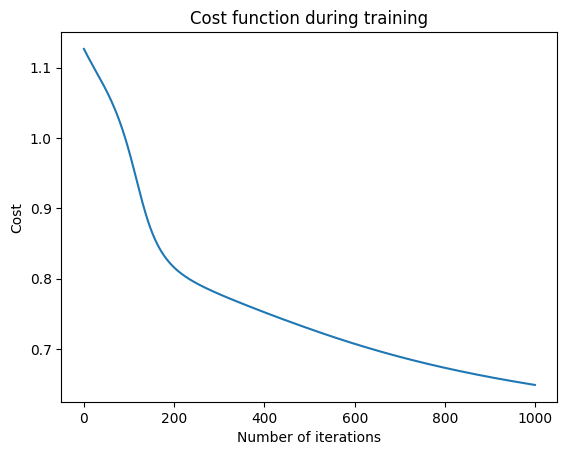

In [49]:
# Plotting the cost function
plt.plot(range(iterations), cost_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('Cost function during training')
plt.show()

In [50]:
# Making predictions
# Predicting on the test data
with torch.no_grad():
    y_pred_prob = model(X_test_tensor)
    y_pred_class = torch.argmax(y_pred_prob, dim=1)

# Calculate accuracy
y_test_class = torch.argmax(y_test_tensor, dim=1)
accuracy = (y_pred_class == y_test_class).sum().item() / y_test_class.size(0)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 1.0000


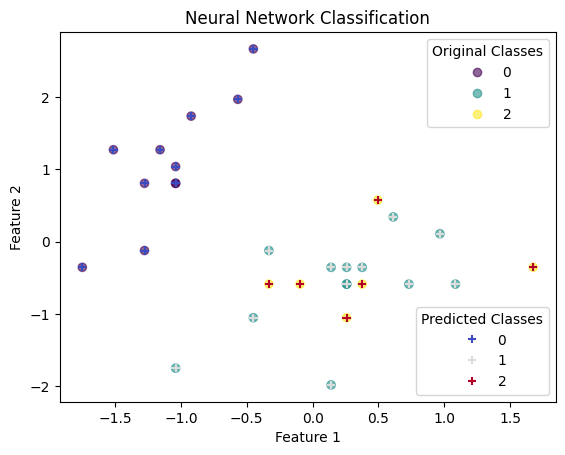

In [51]:
# Plotting the results with a clear legend
fig, ax = plt.subplots()
scatter_original = ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test_class, cmap='viridis', label='Original data', alpha=0.6)
scatter_predicted = ax.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_class, cmap='coolwarm', marker='+', label='Predicted classes')

# Creating a legend
legend1 = ax.legend(*scatter_original.legend_elements(), title="Original Classes")
ax.add_artist(legend1)
legend2 = ax.legend(*scatter_predicted.legend_elements(), title="Predicted Classes", loc="lower right")

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Neural Network Classification')
plt.show()